 <span style="color:white" style="font-size:60px"> Will be the explaining cell for the video </span>.

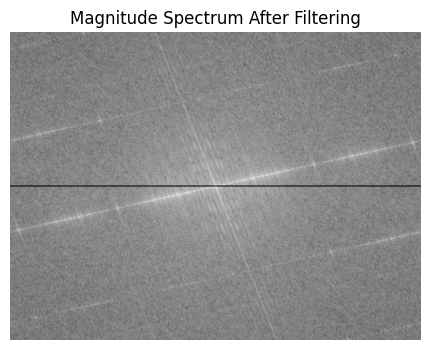

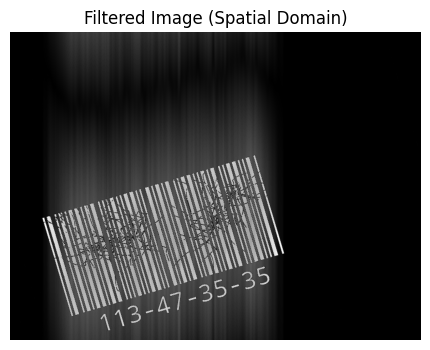

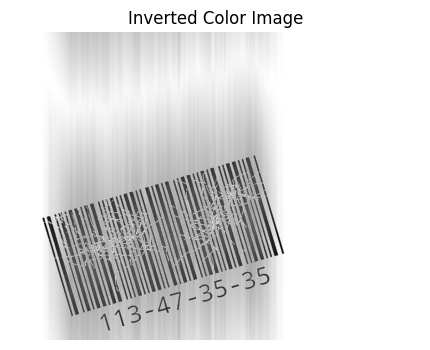

Intensity 0: 0
Intensity 1: 0
Intensity 2: 0
Intensity 3: 0
Intensity 4: 0
Intensity 5: 0
Intensity 6: 0
Intensity 7: 0
Intensity 8: 0
Intensity 9: 0
Intensity 10: 0
Intensity 11: 0
Intensity 12: 0
Intensity 13: 0
Intensity 14: 0
Intensity 15: 0
Intensity 16: 0
Intensity 17: 0
Intensity 18: 0
Intensity 19: 0
Intensity 20: 0
Intensity 21: 0
Intensity 22: 0
Intensity 23: 0
Intensity 24: 0
Intensity 25: 0
Intensity 26: 0
Intensity 27: 0
Intensity 28: 0
Intensity 29: 0
Intensity 30: 0
Intensity 31: 0
Intensity 32: 0
Intensity 33: 0
Intensity 34: 0
Intensity 35: 0
Intensity 36: 0
Intensity 37: 0
Intensity 38: 0
Intensity 39: 0
Intensity 40: 0
Intensity 41: 0
Intensity 42: 0
Intensity 43: 0
Intensity 44: 0
Intensity 45: 0
Intensity 46: 0
Intensity 47: 0
Intensity 48: 0
Intensity 49: 0
Intensity 50: 0
Intensity 51: 0
Intensity 52: 0
Intensity 53: 0
Intensity 54: 0
Intensity 55: 0
Intensity 56: 0
Intensity 57: 0
Intensity 58: 0
Intensity 59: 0
Intensity 60: 0
Intensity 61: 0
Intensity 62: 0
In

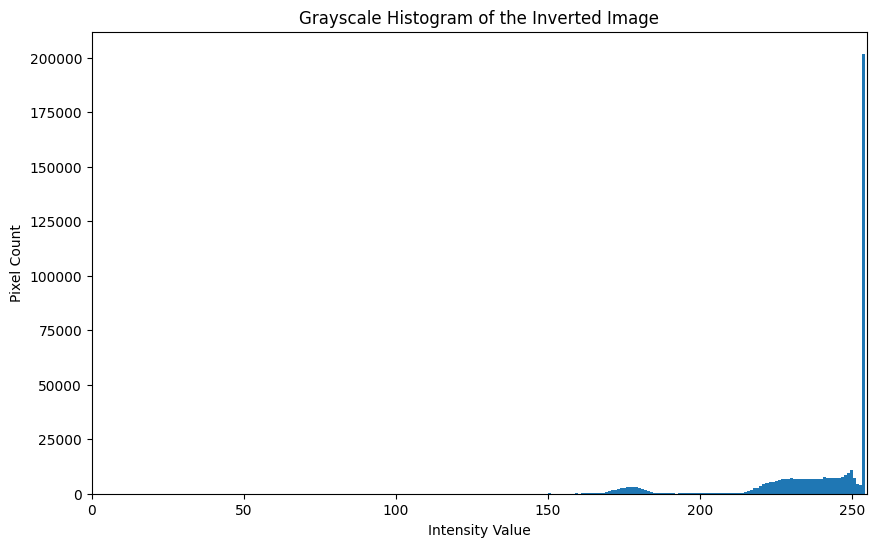

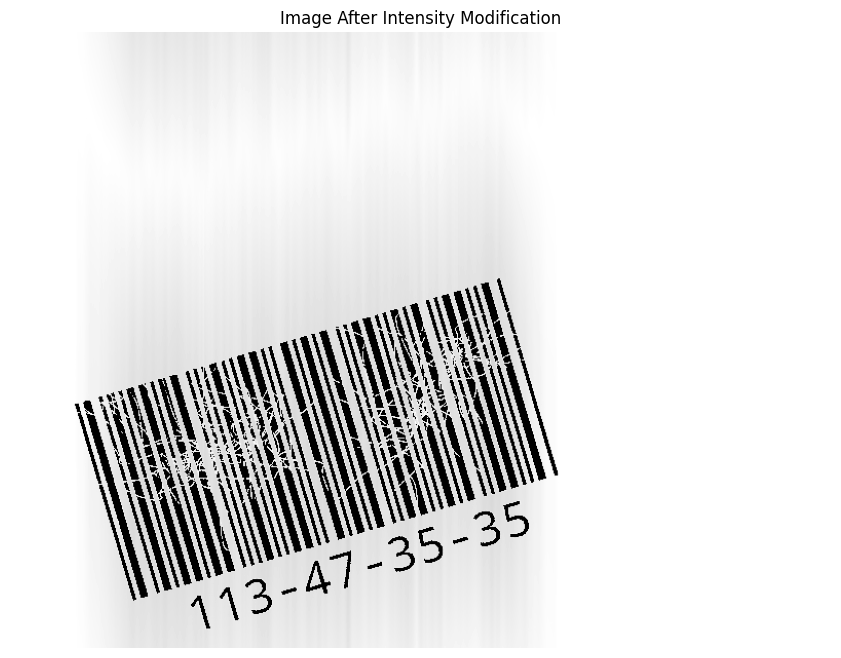

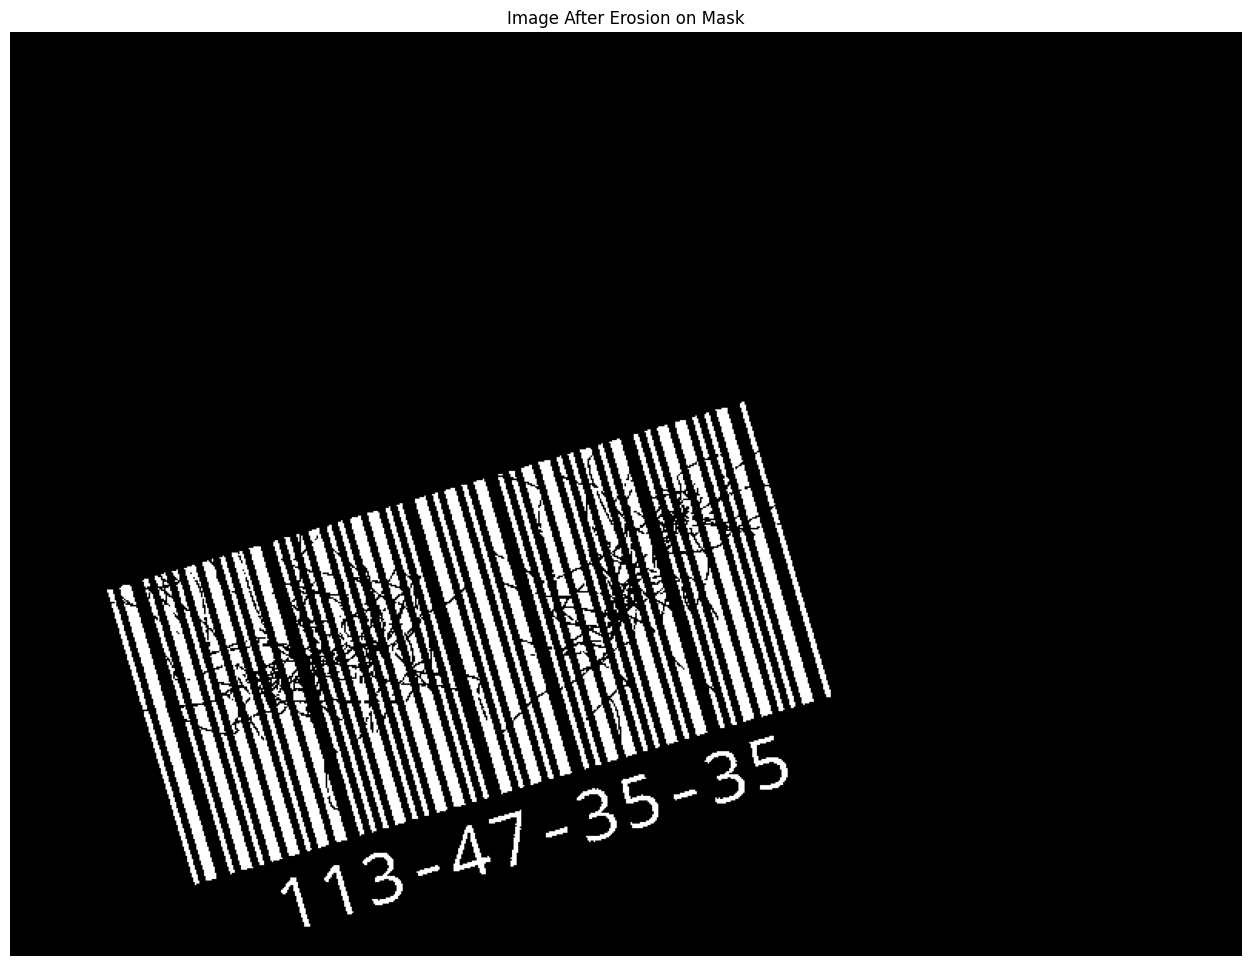

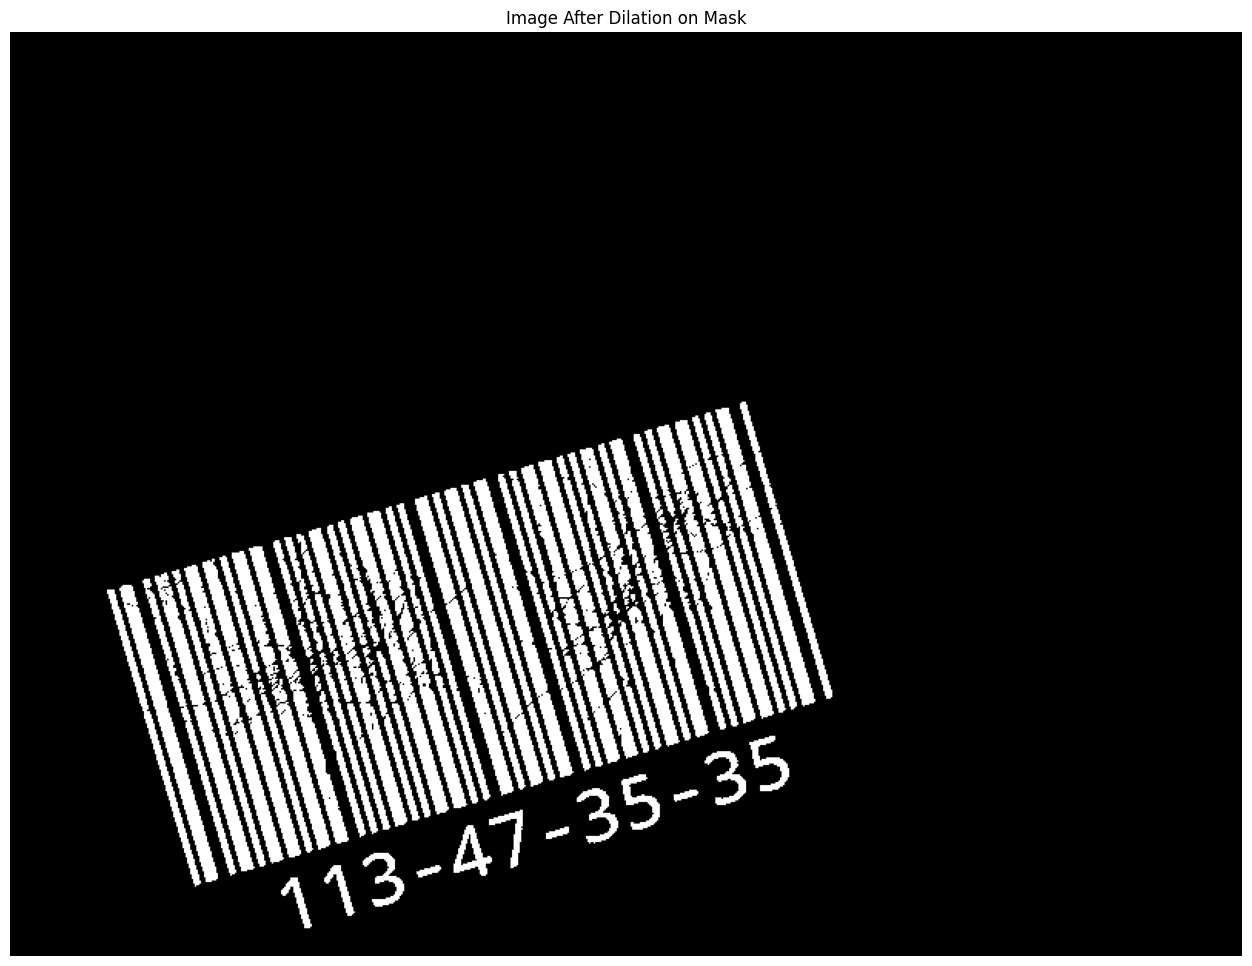

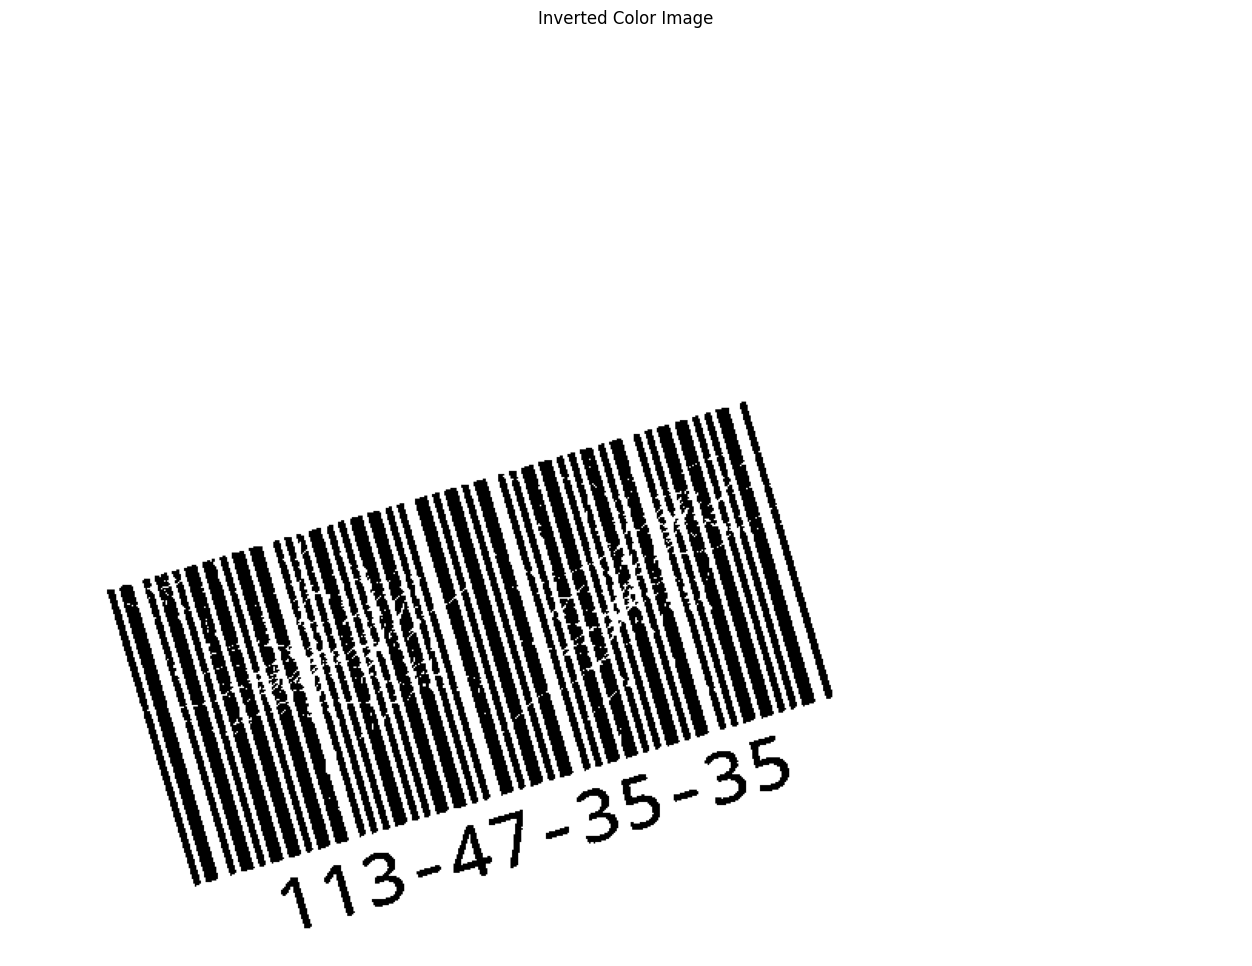

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
from numpy.fft import fft2, fftshift, ifft2, ifftshift
from scipy.ndimage import binary_erosion
import cv2

# Load the image from file
img_path = "test cases/11 - bayza 5ales di bsara7a.jpg"
image = Image.open(img_path).convert('L')  # Convert to grayscale


def transform_image_to_frequency_domain(image):
    # Convert image to numpy array
    img_array = np.array(image)
    
    # Apply Fourier Transform
    f_transform = fft.fft2(img_array)
    
    # Shift the zero frequency component to the center
    f_transform_centered = fft.fftshift(f_transform)
    
    # Magnitude Spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_centered) + 1)
    
    return f_transform_centered, magnitude_spectrum

# Perform the transformation
f_transform_centered, magnitude_spectrum = transform_image_to_frequency_domain(image)

def apply_band_stop_filter(f_transform, direction='horizontal', size=1, width=None):
    """
    Apply a band-stop filter to the Fourier transformed image.

    Parameters:
    - f_transform: 2D numpy array, Fourier transform of the image.
    - direction: str, 'horizontal' or 'vertical' direction for the band stop.
    - size: int, half the height (if horizontal) or half the width (if vertical) of the band-stop area.
    - width: int or None, width of the band across the center of the frequency domain to be zeroed out. If None, it defaults to the full width (horizontal) or height (vertical).

    Returns:
    - f_transform_filtered: 2D numpy array, the filtered Fourier transform.
    """
    rows, cols = f_transform.shape
    crow, ccol = rows // 2, cols // 2
    
    # Create a mask with True values at indices that are outside the band-stop area
    mask = np.ones((rows, cols), dtype=bool)
    
    if direction == 'horizontal':
        if width is None:
            width = cols  # Apply across the full width
        start_col = max(0, ccol - width // 2)
        end_col = min(cols, ccol + width // 2)
        mask[crow-size:crow+size, start_col:end_col] = False
    elif direction == 'vertical':
        if width is None:
            width = rows  # Apply across the full height
        start_row = max(0, crow - width // 2)
        end_row = min(rows, crow + width // 2)
        mask[start_row:end_row, ccol-size:ccol+size] = False
    
    # Apply the mask to the frequency transform
    f_transform_filtered = f_transform * mask
    
    return f_transform_filtered



# Apply the band-stop filter
f_transform_filtered = apply_band_stop_filter(f_transform_centered)

magnitude_spectrum_filtered = np.log(np.abs(f_transform_filtered) + 1)

# Display the magnitude spectrum
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title("Magnitude Spectrum After Filtering")
plt.axis('off')
plt.show()



# Inverse FFT to convert back to spatial domain
img_back = fft.ifft2(fft.ifftshift(f_transform_filtered))
img_back = np.abs(img_back)

# Plot the filtered image in the spatial domain
plt.figure(figsize=(6, 4))
plt.imshow(img_back, cmap='gray')
plt.title("Filtered Image (Spatial Domain)")
plt.axis('off')
plt.show()

img_inverted = 255 - img_back  # Adjust 255 to the maximum intensity of your image if different

# Plot the inverted image
plt.figure(figsize=(6, 4))
plt.imshow(img_inverted, cmap='gray')
plt.title("Inverted Color Image")
plt.axis('off')
plt.show()


# Compute the histogram of the inverted image
histogram, bin_edges = np.histogram(img_inverted, bins=256, range=(0, 255))

# Print the histogram values
for i, count in enumerate(histogram):
    print(f"Intensity {i}: {count}")

# Optionally, you can also visualize the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], histogram, width=1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title("Grayscale Histogram of the Inverted Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()


import numpy as np

def zero_intensity_range(image, low=30, high=210):
    """
    Modify an image to set pixel intensities within a specified range to zero.

    Parameters:
    - image: 2D numpy array, input image.
    - low: int, lower bound of the intensity range.
    - high: int, upper bound of the intensity range.

    Returns:
    - modified_image: 2D numpy array, image after modification.
    """
    modified_image = np.copy(image)  # Make a copy of the image to avoid changing the original
    # Set pixels within the specified range to zero
    modified_image[(modified_image >= low) & (modified_image <= high)] = 0
    return modified_image

# Example of using the function
# Assuming 'img_inverted' is your previously inverted image
img_modified = zero_intensity_range(img_inverted)

# Display the modified image
plt.figure(figsize=(12, 8))
plt.imshow(img_modified, cmap='gray')
plt.title("Image After Intensity Modification")
plt.axis('off')
plt.show()


if img_modified.dtype != np.uint8:
    img_modified = np.uint8(img_modified)

#performing erosion on 0 to 150 and dilation (opening) bas manaualy 3shan el noise

mask = cv2.inRange(img_modified, 0, 150)
kernel = np.ones((1, 1), np.uint8)  
eroded_image = cv2.erode(mask, kernel, iterations=1)

# Display the original and eroded images
plt.figure(figsize=(18, 12))
plt.imshow(eroded_image, cmap='gray')
plt.title("Image After Erosion on Mask")
plt.axis('off')
plt.show()

kernel_size =2
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
# Perform dilation on the eroded image using the circular kernel
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
# Display the original and dilated images
plt.figure(figsize=(18, 12))
plt.imshow(dilated_image, cmap='gray')
plt.title("Image After Dilation on Mask")
plt.axis('off')
plt.show()


img_inverted2 = 255 - dilated_image  # Adjust 255 to the maximum intensity of your image if different
cv2.imwrite('output\\11.jpg', img_inverted2)

# Plot the inverted image
plt.figure(figsize=(18, 12))
plt.imshow(img_inverted2, cmap='gray')
plt.title("Inverted Color Image")
plt.axis('off')
plt.show()






Detection code

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy.fft import fft2, fftshift, ifft2, ifftshift


def detect_noise_sine_waves(image, z_score_threshold=2.5, low_freq_cutoff_ratio=0.02, high_freq_cutoff_ratio=0.5):
    """
    Detect noise sine waves in an image while avoiding structured patterns (e.g., barcodes).

    Parameters:
        image (numpy.ndarray): Input image (grayscale).
        z_score_threshold (float): Z-score threshold for detecting noise.
        low_freq_cutoff_ratio (float): Low frequency cutoff as a ratio of image size.
        high_freq_cutoff_ratio (float): High frequency cutoff as a ratio of image size.

    Returns:
        bool: True if noise sine waves are detected, False otherwise.
    """
    # Convert the image to grayscale if it is not
    gray_image = image

    # Step 1: Apply FFT to transform the image to the frequency domain
    dft = np.fft.fft2(gray_image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = np.abs(dft_shift)

    # Step 2: Compute z-scores of the magnitude spectrum
    mean_mag = np.mean(magnitude_spectrum)
    std_mag = np.std(magnitude_spectrum)
    z_scores = (magnitude_spectrum - mean_mag) / std_mag

    # Step 3: Create a frequency filter
    rows, cols = gray_image.shape
    center_row, center_col = rows // 2, cols // 2
    low_freq_cutoff = int(min(rows, cols) * low_freq_cutoff_ratio)
    high_freq_cutoff = int(min(rows, cols) * high_freq_cutoff_ratio)

    # Create a circular band-pass filter
    y, x = np.ogrid[:rows, :cols]
    distance_from_center = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    band_pass_filter = (distance_from_center >= low_freq_cutoff) & (distance_from_center <= high_freq_cutoff)

    # Exclude central frequencies (structured patterns like barcodes)
    exclusion_width = int(min(rows, cols) * 0.05)  # Exclude a small width around central axes
    band_pass_filter[center_row - exclusion_width:center_row + exclusion_width, :] = False
    band_pass_filter[:, center_col - exclusion_width:center_col + exclusion_width] = False

    # Apply the band-pass filter to the z-score mask
    sine_wave_mask = (z_scores > z_score_threshold) & band_pass_filter

    # Step 4: Enhance the detected regions using dilation
    kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size to control dilation
    enhanced_mask = cv2.dilate(sine_wave_mask.astype(np.uint8), kernel, iterations=1)

    # Check if any sine waves were detected
    if np.any(enhanced_mask):
        print("Noise sine waves detected.")
        return True
    else:
        print("No noise sine waves detected.")
        return False


image = cv2.imread('test cases/11 - bayza 5ales di bsara7a.jpg', cv2.IMREAD_GRAYSCALE)
result = detect_noise_sine_waves(image)
print("Detection result:", result)




Noise sine waves detected.
Detection result: True


The function

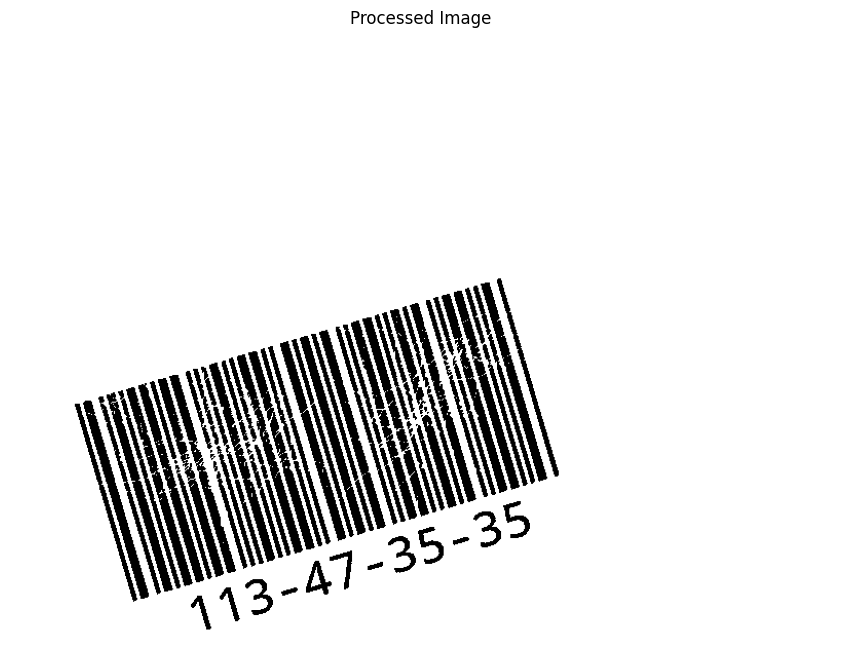

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import cv2
from rotation import rotate_image

def process_sinewave_image(img_path, filter_direction='horizontal', filter_size=1, filter_width=None,
                  intensity_low=30, intensity_high=210, erosion_size=1, dilation_size=2):
    """
    Process an image by applying a band-stop filter in the frequency domain, modifying intensity, 
    and performing morphological operations to reduce noise.

    Parameters:
    - img_path: str, path to the image file.
    - filter_direction: str, direction of the band-stop filter ('horizontal' or 'vertical').
    - filter_size: int, size of the filter band.
    - filter_width: int or None, width of the filter band. If None, uses full dimension.
    - intensity_low: int, lower bound for zeroing intensities.
    - intensity_high: int, upper bound for zeroing intensities.
    - erosion_size: int, size of the erosion kernel.
    - dilation_size: int, size of the dilation kernel.

    Returns:
    - None, displays the processed image and saves it to a file.
    """
    image = Image.open(img_path).convert('L')  # Convert to grayscale
    f_transform_centered, magnitude_spectrum = transform_image_to_frequency_domain(image)

    # Apply the band-stop filter
    f_transform_filtered = apply_band_stop_filter(f_transform_centered, direction=filter_direction,
                                                  size=filter_size, width=filter_width)
    img_back = fft.ifft2(fft.ifftshift(f_transform_filtered))
    img_inverted = 255 - np.abs(img_back)

    # Zero certain intensity ranges
    img_modified = zero_intensity_range(img_inverted, low=intensity_low, high=intensity_high)

    # Morphological operations: erosion followed by dilation
    mask = cv2.inRange(img_modified, 0, 150)
    kernel = np.ones((erosion_size, erosion_size), np.uint8)  
    eroded_image = cv2.erode(mask, kernel, iterations=1)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilation_size, dilation_size))
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    img_final = 255 - dilated_image

    # Save and plot the final image
    output_path = 'output/11.jpg'
    cv2.imwrite(output_path, img_final)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_final, cmap='gray')
    plt.title("Processed Image")
    plt.axis('off')
    plt.show()

def transform_image_to_frequency_domain(image):
    img_array = np.array(image)
    f_transform = fft.fft2(img_array)
    f_transform_centered = fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_transform_centered) + 1)
    return f_transform_centered, magnitude_spectrum

def apply_band_stop_filter(f_transform, direction='horizontal', size=1, width=None):
    rows, cols = f_transform.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), dtype=bool)
    if direction == 'horizontal':
        if width is None:
            width = cols
        start_col = max(0, ccol - width // 2)
        end_col = min(cols, ccol + width // 2)
        mask[crow-size:crow+size, start_col:end_col] = False
    elif direction == 'vertical':
        if width is None:
            width = rows
        start_row = max(0, crow - width // 2)
        end_row = min(rows, crow + width // 2)
        mask[start_row:end_row, ccol-size:ccol+size] = False
    return f_transform * mask

def zero_intensity_range(image, low=30, high=210):
    modified_image = np.copy(image)
    modified_image[(modified_image >= low) & (modified_image <= high)] = 0
    return modified_image


process_sinewave_image("test cases/11 - bayza 5ales di bsara7a.jpg")
img = cv2.imread("output/11.jpg")
rotate_image(img,"output/11Rotated.jpg")


